C:\Users\ppooj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ppooj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ppooj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ppooj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

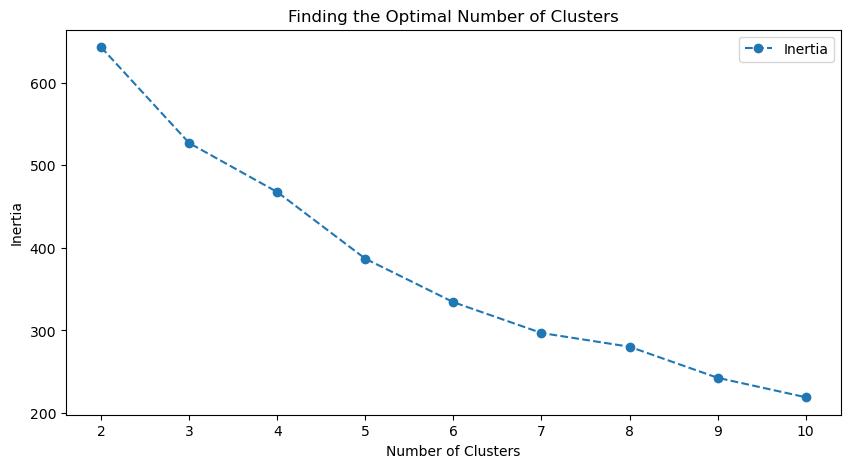

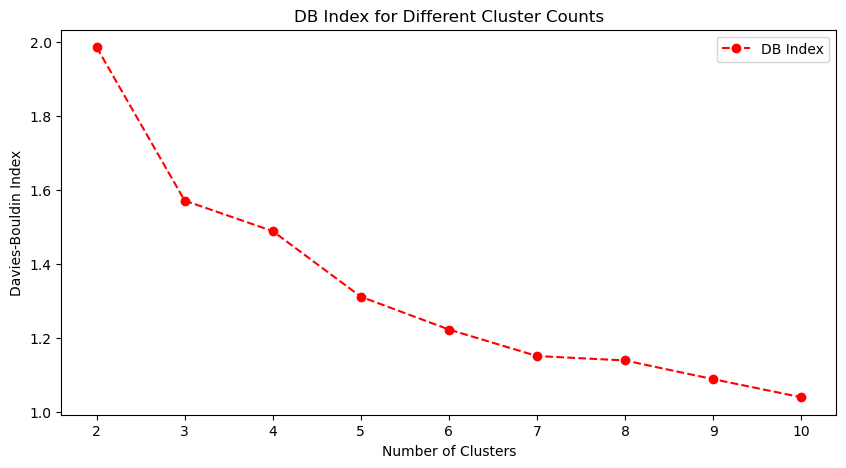

C:\Users\ppooj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.57
Silhouette Score: 0.20


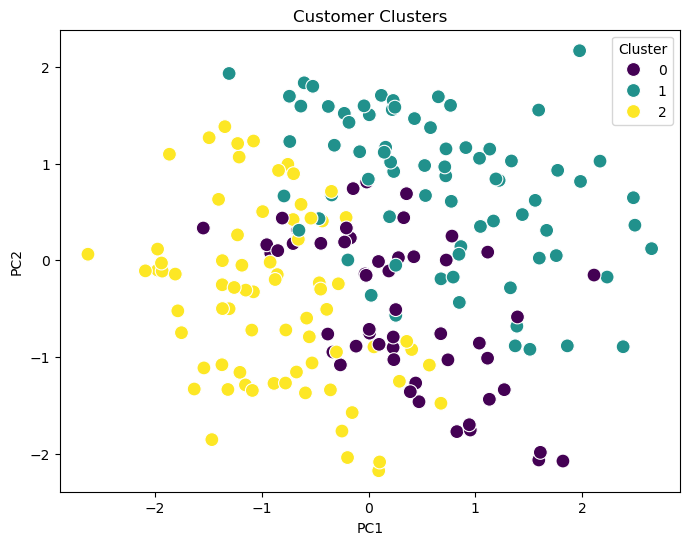

Results saved to 'FirstName_LastName_Clustering.csv'


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

# Merge data to create a complete customer profile
data = pd.merge(transactions, products, on="ProductID")
data = pd.merge(data, customers, on="CustomerID")

# Summarize spending by customer and product category
customer_spending = data.pivot_table(
    index="CustomerID", columns="Category", values="TotalValue", aggfunc="sum", fill_value=0
)

# Normalize and transform the data to reduce skewness
scaler = StandardScaler()
power_transformer = PowerTransformer()  # Handles skewness better
scaled_data = scaler.fit_transform(customer_spending)
normalized_data = power_transformer.fit_transform(scaled_data)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
db_scores = []  # To track DB Index for different k values

for k in range(2, 11):
    model = KMeans(n_clusters=k, init="k-means++", random_state=42)
    model.fit(normalized_data)
    inertia.append(model.inertia_)
    db_scores.append(davies_bouldin_score(normalized_data, model.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--', label='Inertia')
plt.title("Finding the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()

# Plot Davies-Bouldin Index for different k values
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--', color='red', label='DB Index')
plt.title("DB Index for Different Cluster Counts")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.legend()
plt.show()

# Choose the number of clusters (based on lower DB Index)
k = 3  # Select cluster count with a low DB Index
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
kmeans.fit(normalized_data)

# Add cluster labels to the customer profile
customer_spending['Cluster'] = kmeans.labels_

# Calculate clustering metrics
db_index = davies_bouldin_score(normalized_data, kmeans.labels_)
silhouette_avg = silhouette_score(normalized_data, kmeans.labels_)

print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# Save clustering results to a CSV file
customer_spending['Cluster'].to_csv("FirstName_LastName_Clustering.csv")
print("Results saved to 'FirstName_LastName_Clustering.csv'")